# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [54]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how = 'left')

# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [55]:
# Checking the number of mice.
num_mice = merge_df["Mouse ID"].nunique()
print(f'{num_mice}')

249


In [56]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()

duplicate_rows

array(['g989'], dtype=object)

In [57]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = merge_df[merge_df['Mouse ID'] == 'g989']

duplicate_data.head(15)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [76]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merge_df.drop_duplicates(subset = ['Mouse ID', 'Timepoint'], keep=False)

clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [77]:
# Checking the number of mice in the clean DataFrame.
clean_data['Mouse ID'].nunique()

249

## Summary Statistics

In [82]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
grouped_data = clean_data.groupby('Drug Regimen')

summary_statistic = grouped_data['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_statistic.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']

summary_statistic.head(10)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [83]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
sum_stats_2 = grouped_data.agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

sum_stats_2.head(10)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.458254  50.854632  44.053659  6.637293  0.540135
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

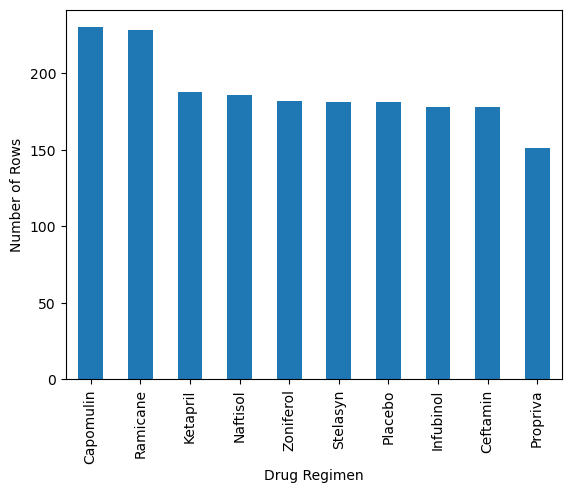

In [94]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_bar = clean_data["Drug Regimen"].value_counts()

regimen_bar.plot(kind = 'bar')

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

plt.show()

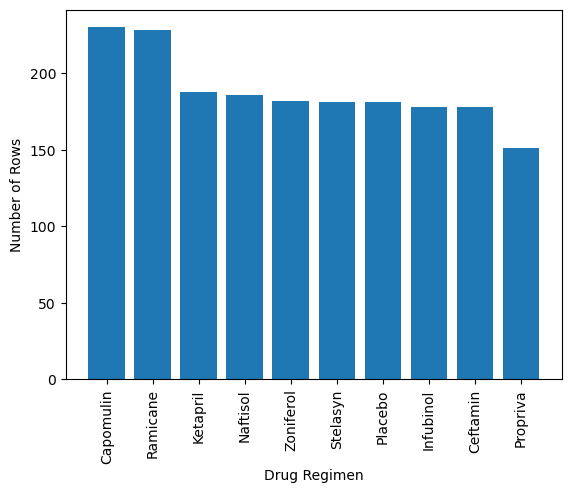

In [98]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts = clean_data['Drug Regimen'].value_counts()

plt.bar(drug_counts.index, drug_counts)

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation = 90)

plt.show()

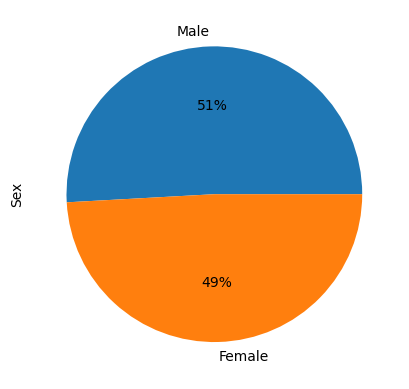

In [110]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_dist = clean_data['Sex'].value_counts()

sex_dist.plot(kind = 'pie', autopct = '%1.0f%%')

plt.ylabel('Sex')

plt.show()

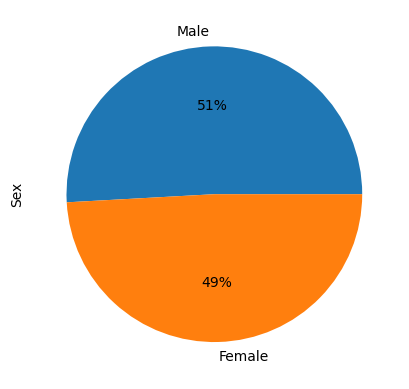

In [113]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_dist_2 = clean_data['Sex'].value_counts()

plt.pie(sex_dist_2, labels = sex_dist_2.index, autopct = '%1.0f%%')

plt.ylabel('Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [146]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Select the specified treatment regimens
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the DataFrame for the specified regimens
selected_data = clean_data[clean_data['Drug Regimen'].isin(selected_regimens)]

# Get the last (greatest) timepoint for each mouse
last_timepoints = selected_data.groupby('Mouse ID')['Timepoint'].max()

# Create a DataFrame with Mouse ID and corresponding last timepoint
last_timepoints_df = pd.DataFrame({'Mouse ID': last_timepoints.index, 'Timepoint': last_timepoints.values})

# Merge the last timepoints DataFrame with the original DataFrame to get tumor volume at the last timepoint
merged_data_last_timepoint = pd.merge(last_timepoints_df, clean_data, on=['Mouse ID', 'Timepoint'], how='inner')

In [148]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Empty list to fill with tumor volume data
tumor_vol_data = []

for treatment in treatments:
    treatment_data = merged_data_last_timepoint[merged_data_last_timepoint['Drug Regimen'] == treatment]
    
    tumor_vol = treatment_data['Tumor Volume (mm3)']
    
    tumor_vol_data.append(tumor_vol)
    
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    
    outliers = treatment_data[(treatment_data['Tumor Volume (mm3)'] < lower_bound) | (treatment_data['Tumor Volume (mm3)'] > upper_bound)]
    
    print(f"Potential outliers for {treatment}:")
    print(outliers[['Mouse ID', 'Tumor Volume (mm3)']])
    

Potential outliers for Capomulin:
Empty DataFrame
Columns: [Mouse ID, Tumor Volume (mm3)]
Index: []
Potential outliers for Ramicane:
Empty DataFrame
Columns: [Mouse ID, Tumor Volume (mm3)]
Index: []
Potential outliers for Infubinol:
   Mouse ID  Tumor Volume (mm3)
15     c326           36.321346
Potential outliers for Ceftamin:
Empty DataFrame
Columns: [Mouse ID, Tumor Volume (mm3)]
Index: []


ValueError: Dimensions of labels and X must be compatible

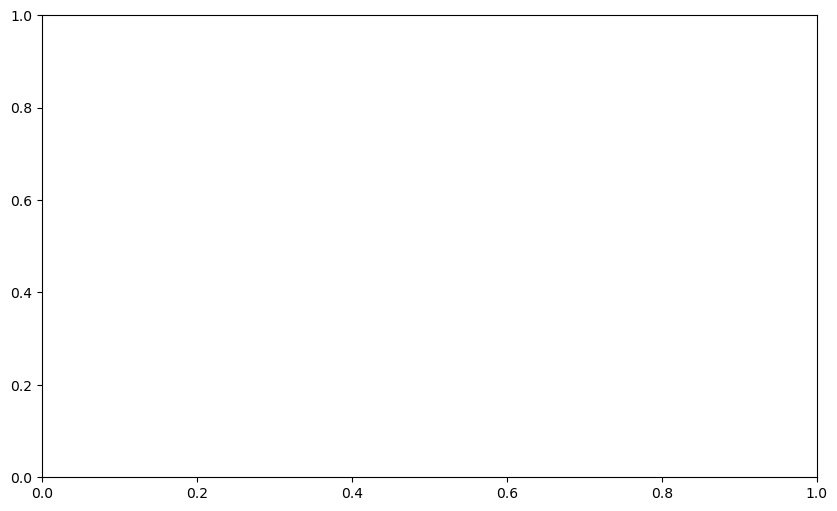

In [149]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10,6))
plt.boxplot(treatment, labels = tumor_vol_data, sym = 'r+')

plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

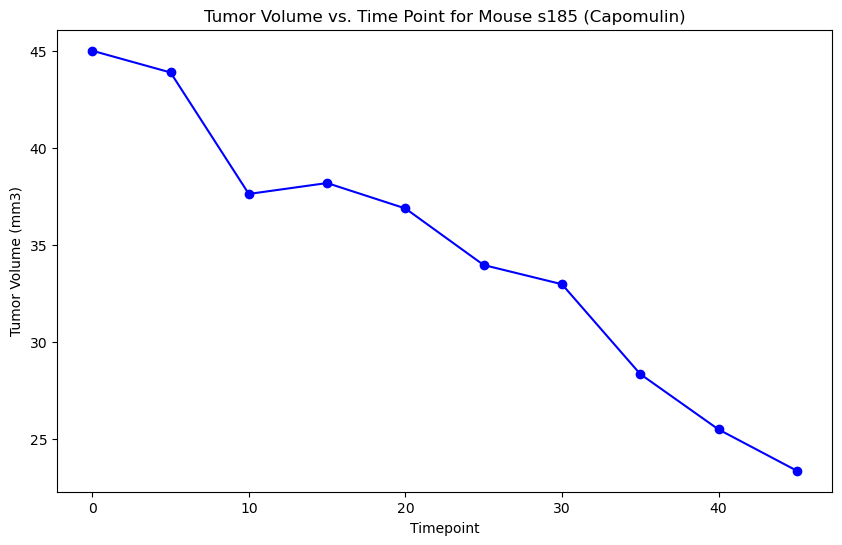

In [151]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
selected_mouse = 's185'  # Replace with the desired Mouse ID

mouse_data_capomulin = clean_data[(clean_data['Drug Regimen'] == 'Capomulin') & (clean_data['Mouse ID'] == selected_mouse)]

plt.figure(figsize=(10, 6))
plt.plot(mouse_data_capomulin['Timepoint'], mouse_data_capomulin['Tumor Volume (mm3)'], marker='o', linestyle='-', color='blue')

plt.title(f'Tumor Volume vs. Time Point for Mouse {selected_mouse} (Capomulin)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

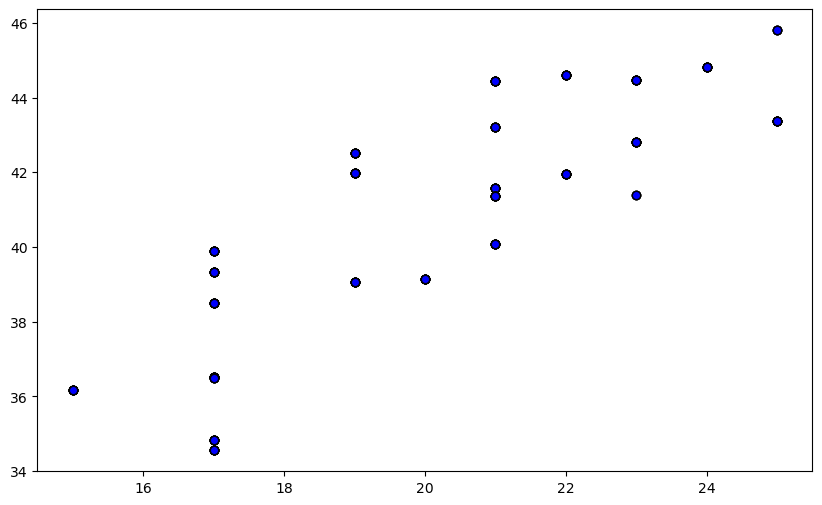

In [153]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

merged_data_capomulin = pd.merge(capomulin_data, avg_tumor_volume.reset_index(), on='Mouse ID', suffixes=('', '_avg'))

plt.figure(figsize=(10, 6))
plt.scatter(merged_data_capomulin['Weight (g)'], merged_data_capomulin['Tumor Volume (mm3)_avg'], color='blue', edgecolors='black')

## Correlation and Regression

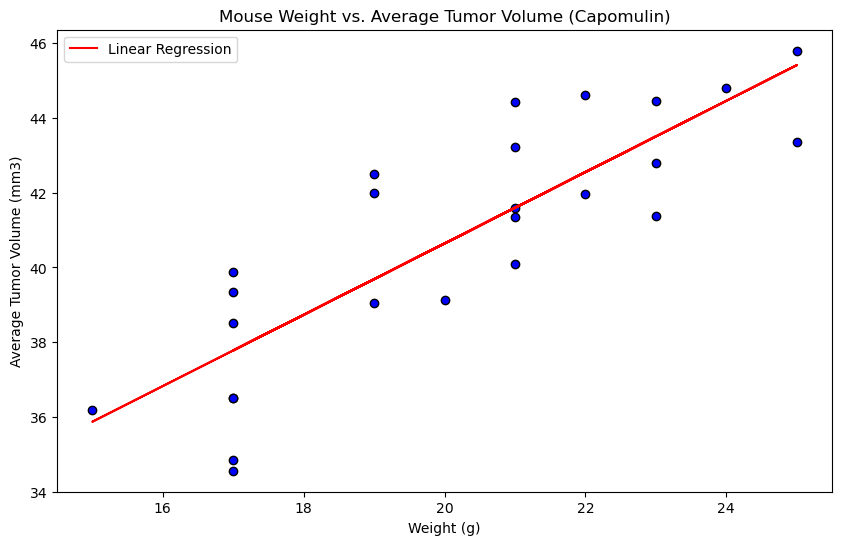

Correlation Coefficient: 0.84


In [161]:
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

avg_tumor_weight = capomulin_data.groupby(['Mouse ID', 'Weight (g)'])['Tumor Volume (mm3)'].mean().reset_index()

correlation_coefficient = avg_tumor_weight['Weight (g)'].corr(avg_tumor_weight['Tumor Volume (mm3)'])

regression_result = st.linregress(avg_tumor_weight['Weight (g)'], avg_tumor_weight['Tumor Volume (mm3)'])

plt.figure(figsize=(10, 6))
plt.scatter(avg_tumor_weight['Weight (g)'], avg_tumor_weight['Tumor Volume (mm3)'], color='blue', edgecolor='black')
plt.plot(avg_tumor_weight['Weight (g)'], regression_result.intercept + regression_result.slope * avg_tumor_weight['Weight (g)'], color='red', label='Linear Regression')

plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()

plt.show()

print(f"Correlation Coefficient: {correlation_coefficient:.2f}")